<a href="https://colab.research.google.com/github/anandchikka/anandchikka/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plot_confusion_matrix

In [70]:
#Importing all the libraries to be used
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#Loading data
from google.colab import drive
drive.mount('/content/drive')

# Assuming the file is in your Drive's root directory:
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [42]:
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']

In [43]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<ipython-input-76-9baa481bea2f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x= df["label"], palette= colors)


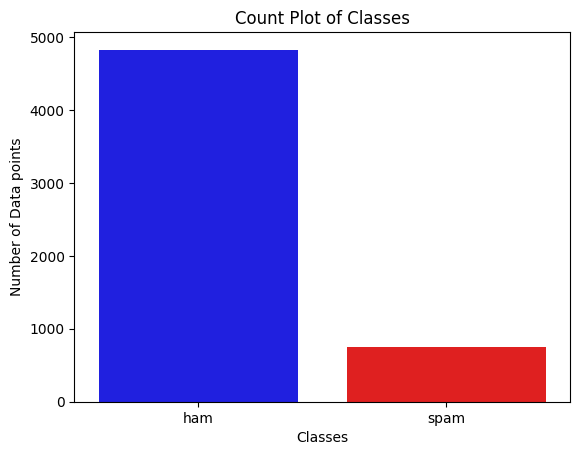

In [76]:
colors= ["Blue", "Red"]
#first of all let us evaluate the target and find out if our data is imbalanced or not
fg = sns.countplot(x= df["label"], palette= colors)
fg.set_title("Count Plot of Classes")
fg.set_xlabel("Classes")
fg.set_ylabel("Number of Data points")
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [46]:
vectorizer = CountVectorizer()

In [47]:
X_train_vectorized = vectorizer.fit_transform(X_train)

In [48]:
X_test_vectorized = vectorizer.transform(X_test)

In [49]:
classifier = MultinomialNB()

In [50]:
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [51]:
predictions = classifier.predict(X_test_vectorized)

In [52]:
accuracy = accuracy_score(y_test, predictions)

In [53]:
conf_matrix = confusion_matrix(y_test, predictions)

In [54]:
class_report = classification_report(y_test, predictions)

In [56]:
print('Accuracy: ', accuracy)

Accuracy:  0.9838565022421525


In [59]:
print(f'Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[963   2]
 [ 16 134]]


In [60]:
print(f'Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

